Basic machine learning tasks, using https://github.com/neksa/biof509/blob/master/Wk02-Common-ML-tasks.ipynb

In [24]:
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

print("Numpy:", np.__version__)

random.seed(0)

Numpy: 1.12.1


Travelling salesman problem:
Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city? To solve, we will visit the cities in all possible combinations and see which way is shortest. 

In [45]:
def distance(coords):
    """Computes the distance between all coordinates using the ol' classic formula"""
    distance = 0
    # visit each one city from another city.
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance

def find_best_route(coords):
    best_distance = distance(coords) # This is the diagonal distance between the two coordinates
    best = coords
    # .permutations creates len(coords) tuples of all possible combos
    combos = itertools.permutations(coords, len(coords)) 
    for option in combos:
        # try to find the distance between all cities in all permutations
        option_distance = distance(option)
        if option_distance < best_distance:
            best = option
            best_distance = option_distance
    return (best_distance, best)





[(699, 400), (857, 722), (537, 282), (534, 831), (241, 869), (220, 916), (695, 603), (845, 972)]


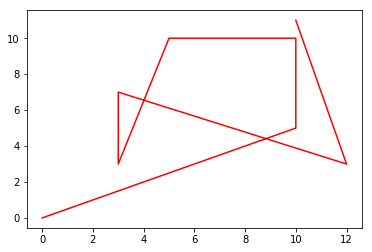

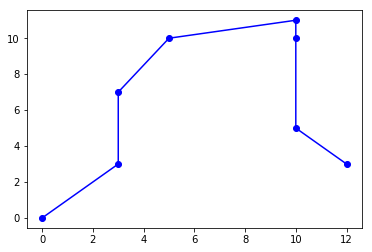

In [46]:
# Create list of eight sets of coordinates
coordinates = [(random.randint(0,1000), random.randint(0,1000)) for i in range(8)]
print(coordinates)

# takes the first element in each tuple in the coordinate list.
x = np.array([x[0] for x in coords])
y = np.array([y[1] for y in coords])
plt.plot(x, y, 'r-')
plt.show()

best_distance, best_coords = find_best_route(coords)

best_x = np.array([x[0] for x in best_coords])
best_y = np.array([y[1] for y in best_coords])

plt.plot(best_x, best_y, 'bo-')
plt.show()

Now is the time to start optimizing. 

In [50]:
coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(10)]
print(coords)

timings3 = %timeit -o -r 1 find_best_route(coords[:3])
timings4 = %timeit -o -r 1 find_best_route(coords[:4])
timings5 = %timeit -o -r 1 find_best_route(coords[:5])
timings6 = %timeit -o -r 1 find_best_route(coords[:6])
timings7 = %timeit -o -r 1 find_best_route(coords[:7])
timings8 = %timeit -o -r 1 find_best_route(coords[:8])
timings9 = %timeit -o -r 1 find_best_route(coords[:9])
timings10 = %timeit -o -r 1 find_best_route(coords[:10])

timings = [t.best for t in [timings3, timings4, timings5, timings6, timings7, timings8, timings9, timings10]]


[(429, 593), (281, 461), (504, 676), (656, 717), (938, 812), (365, 84), (332, 627), (118, 498), (601, 645), (343, 865)]
10000 loops, best of 1: 21.2 µs per loop
10000 loops, best of 1: 94.7 µs per loop
1000 loops, best of 1: 530 µs per loop
100 loops, best of 1: 3.91 ms per loop
10 loops, best of 1: 31.9 ms per loop
1 loop, best of 1: 293 ms per loop
1 loop, best of 1: 3.08 s per loop
1 loop, best of 1: 41 s per loop


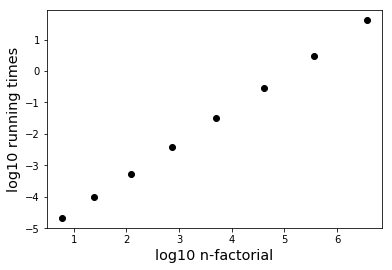

In [51]:
perms = [math.factorial(i) for i in range(3, 11)]

fig, ax = plt.subplots(1,1)
ax.plot(np.log10(perms), np.log10(timings), 'ko')
ax.set_xlabel('log10 n-factorial', size='x-large')
ax.set_ylabel('log10 running times', size='x-large')
plt.show()


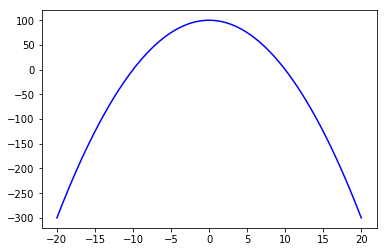

In [52]:
def output_function(x):
    return 100 - x ** 2

inputs = np.linspace(-20, 20, 200)
plt.plot(inputs, output_function(inputs), 'b-')
plt.show()

50.55551882981089
Number of routes considered: 40320


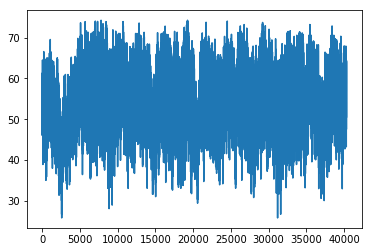

In [53]:
coords = [(0,0), (10,5), (10,10), (5,10), (3,3), (3,7), (12,3), (10,11)]


def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


print(distance(coords))

all_options = []
for option in itertools.permutations(coords, len(coords)):
    all_options.append((option, distance(option)))
#all_options.sort(key=lambda x: x[1])


print('Number of routes considered:', len(all_options))

plt.plot([i[1] for i in all_options])
plt.show()

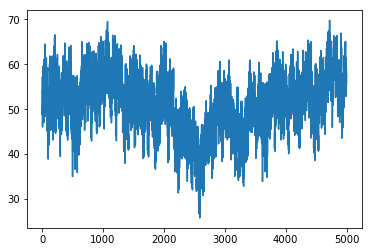

In [54]:
plt.plot([i[1] for i in all_options[:5000]])
plt.show()



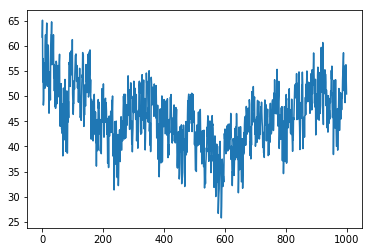

In [55]:
plt.plot([i[1] for i in all_options[2000:3000]])
plt.show()



It's time to move on to simulated annealing and genetic algorithms